In [40]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import os
import cv2 # type: ignore
import tensorflow as tf# type: ignore
from sklearn.model_selection import train_test_split# type: ignore
from keras.preprocessing.image import ImageDataGenerator# type: ignore
from tensorflow import keras# type: ignore
from keras.models import Sequential# type: ignore
from keras.layers import Dense, Dropout, Flatten# type: ignore
from keras.layers import Conv2D, MaxPooling2D# type: ignore
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image


In [41]:
nutrition_deficiency = os.listdir('C:/Users/mrina/Desktop/₹/endtoend/groundnut leaf classification and detection/Groundnut_Leaf_dataset/train/exp2/nutrition_deficiency_1')
healthy_leaf = os.listdir('C:/Users/mrina/Desktop/₹/endtoend/groundnut leaf classification and detection/Groundnut_Leaf_dataset/train/exp2/healthy_leaf_1')

In [42]:
print('Number of images:', len(nutrition_deficiency))
print('Number of images:', len(healthy_leaf))


Number of images: 1255
Number of images: 1462


In [43]:
nutrition_deficiency_labels = [0]*1255
healthy_leaf_labels = [1]*1462

In [44]:
labels= nutrition_deficiency_labels + healthy_leaf_labels

In [45]:
nutrition_deficiency_path= 'C:/Users/mrina/Desktop/₹/endtoend/groundnut leaf classification and detection/Groundnut_Leaf_dataset/train/exp2/nutrition_deficiency_1/'
data = []

for img_file in nutrition_deficiency:

  image = Image.open(nutrition_deficiency_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

healthy_leaf_path = 'C:/Users/mrina/Desktop/₹/endtoend/groundnut leaf classification and detection/Groundnut_Leaf_dataset/train/exp2/healthy_leaf_1/'
for img_file in healthy_leaf:

  image = Image.open(healthy_leaf_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)  

In [46]:
X = np.array(data)
Y = np.array(labels)


In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

In [48]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [49]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())


model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(2, activation='sigmoid'))

In [50]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [51]:
history = model.fit(X_train_scaled, Y_train, epochs=20)

Epoch 1/20


68/68 [==============================] - 8s 80ms/step - loss: 0.4598 - acc: 0.7773
Epoch 2/20
68/68 [==============================] - 6s 86ms/step - loss: 0.2904 - acc: 0.9024
Epoch 3/20
68/68 [==============================] - 6s 85ms/step - loss: 0.2416 - acc: 0.9162
Epoch 4/20
68/68 [==============================] - 6s 84ms/step - loss: 0.1896 - acc: 0.9314
Epoch 5/20
68/68 [==============================] - 6s 82ms/step - loss: 0.1660 - acc: 0.9370
Epoch 6/20
68/68 [==============================] - 6s 82ms/step - loss: 0.1492 - acc: 0.9425
Epoch 7/20
68/68 [==============================] - 5s 79ms/step - loss: 0.1333 - acc: 0.9406
Epoch 8/20
68/68 [==============================] - 6s 82ms/step - loss: 0.0928 - acc: 0.9664
Epoch 9/20
68/68 [==============================] - 5s 80ms/step - loss: 0.0751 - acc: 0.9733
Epoch 10/20
68/68 [==============================] - 6s 81ms/step - loss: 0.0811 - acc: 0.9715
Epoch 11/20
68/68 [==============================] - 6s 8

In [52]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

17/17 [==============================] - 1s 25ms/step - loss: 0.2711 - acc: 0.9283
Test Accuracy = 0.9283088445663452


In [53]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

17/17 [==============================] - 1s 27ms/step


In [54]:
from sklearn import metrics


print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.98      0.80       264
           1       0.96      0.57      0.72       280

    accuracy                           0.77       544
   macro avg       0.82      0.78      0.76       544
weighted avg       0.83      0.77      0.76       544



[[258   6]
 [119 161]]


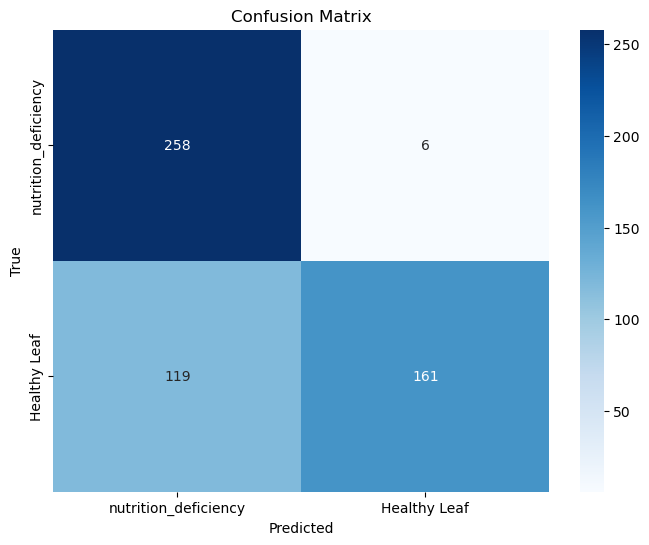

In [58]:
from sklearn.metrics import confusion_matrix,roc_curve,auc
import seaborn as sns
conf_matrix = confusion_matrix(Y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['nutrition_deficiency', 'Healthy Leaf'], yticklabels=['nutrition_deficiency', 'Healthy Leaf'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

17/17 [==============================] - 1s 30ms/step


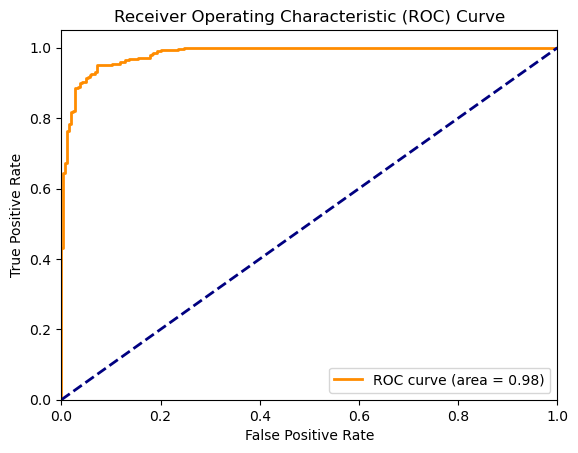

In [59]:
y_pred_prob = model.predict(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model.save('groundnut_leaf_classifier_model2.h5')

In [ ]:
# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model
 
# load model
model = load_model('groundnut_leaf_classifier_model2.h5')

In [ ]:
model.summary()

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))